### task 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
***
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
***
Вычислите средние значения price и CRIM в разных кластерах

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

In [16]:
boston = load_boston()

c:\users\user\desktop\data-science\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [17]:
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=['price'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [19]:
labels_train = model.fit_predict(x_train)
labels_test = model.predict(x_test)

In [23]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

c:\users\user\desktop\data-science\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


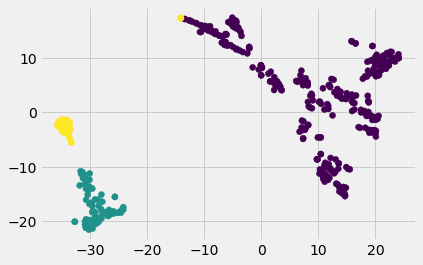

In [31]:
plt.style.use('fivethirtyeight')
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

In [52]:
train_CRIM_0 = x_train.loc[labels_train==0, 'CRIM'].mean()
train_CRIM_1 = x_train.loc[labels_train==1, 'CRIM'].mean()
train_CRIM_2 = x_train.loc[labels_train==2, 'CRIM'].mean()

In [53]:
train_price_0 = y_train[labels_train==0].mean()
train_price_1 = y_train.loc[labels_train==1, 'price'].mean()
train_price_2 = y_train.loc[labels_train==2, 'price'].mean()

In [65]:
print(train_CRIM_0,train_CRIM_1, train_CRIM_2,
      train_price_0, train_price_1, train_price_2, sep='\n')

0.40486282828282827
11.745661842105262
14.360380322580646
price    25.168687
dtype: float64
17.442105263157895
13.196774193548388


### task 2 and task 3

In [82]:
class SplitClustersBoston:

    # __slots__ = ('x', 'y')
    def __init__(self):
        %config InlineBackend.figure_format = 'svg'
        plt.style.use('fivethirtyeight')
        boston = load_boston()
        self.x = pd.DataFrame(boston.data, columns=boston.feature_names)
        self.y = pd.DataFrame(boston.target, columns=['price'])

    def split_data(self, test_size, random_state):
        self.x_train, self.x_test, self.y_train, self.y_test =\
        train_test_split(self.x, self.y, test_size=test_size, random_state=random_state)

    def k_means_model(self, n_clust, max_iter, random_state):
        self.k_means = KMeans(n_clusters=n_clust, max_iter=max_iter, random_state=random_state)

    def labels(self):
        self.labels_train = self.k_means.fit_predict(self.x_train)
        self.labels_test = self.k_means.predict(self.x_test)

    def t_sne_model(self, n_comp, learn_rate, random_state):
        self.tsne = TSNE(n_components=n_comp, learning_rate=learn_rate, random_state=random_state)

    def train_transform_tsne(self):
        self.x_train_tsne = self.tsne.fit_transform(self.x_train)

    def test_transform_tsne(self):
        self.x_test_tsne = self.tsne.fit_transform(self.x_test)

    def train_plt_scatter(self):
        plt.scatter(self.x_train_tsne[:, 0], self.x_train_tsne[:, 1], c=self.labels_train)

    def test_plt_scatter(self):
        plt.scatter(self.x_test_tsne[:, 0], self.x_test_tsne[:, 1], c=self.labels_test)

    def get_train(self, param):
        if param == 'x':
            return self.x_train
        elif param == 'y':
            return self.y_train

    def get_test(self, param):
        if param == 'x':
            return self.x_test
        elif param == 'y':
            return self.y_test

    def get_labels_train(self):
        return self.labels_train

    def get_labels_test(self):
        return self.labels_test

In [83]:
my_model = SplitClustersBoston()
my_model.split_data(0.2, 100)

c:\users\user\desktop\data-science\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California ho

In [84]:
my_model.k_means_model(3, 100, 100)
my_model.labels()

In [88]:
my_model.t_sne_model(2, 150, 100)
my_model.train_transform_tsne()
my_model.test_transform_tsne()

c:\users\user\desktop\data-science\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\user\desktop\data-science\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


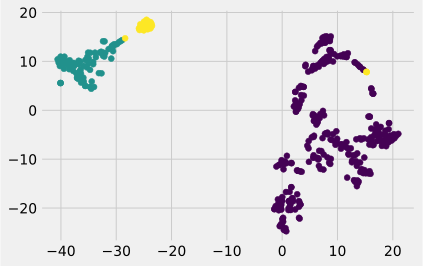

In [91]:
# there is one outlier !
my_model.train_plt_scatter()

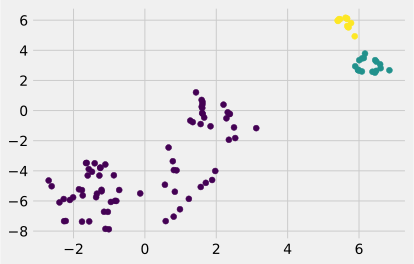

In [92]:
my_model.test_plt_scatter()

In [94]:
train_labels = my_model.get_labels_train()
test_labels = my_model.get_labels_test()

In [99]:
model_train_x = my_model.get_train('x')
model_test_x = my_model.get_test('x')

In [110]:
print(np.mean(model_train_x.loc[train_labels==0, 'CRIM']).astype(dtype=np.float16), 'It is mean value for train data where column is CRIM and cluster is 0')
print(np.mean(model_train_x.loc[train_labels==1, 'CRIM']).astype(dtype=np.float16), 'It is mean value for train data where column is CRIM and cluster is 1')
print(np.mean(model_train_x.loc[train_labels==2, 'CRIM']).astype(dtype=np.float16), 'It is mean value for train data where column is CRIM and cluster is 2')

0.3481 It is mean value for train data where column is CRIM and cluster is 0
9.97 It is mean value for train data where column is CRIM and cluster is 1
14.94 It is mean value for train data where column is CRIM and cluster is 2


In [113]:
print(np.mean(model_test_x.loc[test_labels==0, 'CRIM']).astype(dtype=np.float16), 'It is mean value for test data where column is CRIM and cluster is 0')
print(np.mean(model_test_x.loc[test_labels==1, 'CRIM']).astype(dtype=np.float16), 'It is mean value for test data where column is CRIM and cluster is 1')
print(np.mean(model_test_x.loc[test_labels==2, 'CRIM']).astype(dtype=np.float16), 'It is mean value for test data where column is CRIM and cluster is 2')

0.4827 It is mean value for test data where column is CRIM and cluster is 0
15.625 It is mean value for test data where column is CRIM and cluster is 1
15.836 It is mean value for test data where column is CRIM and cluster is 2


In [114]:
model_train_price = my_model.get_train('y')
model_test_price = my_model.get_test('y')

In [120]:
print(np.mean(model_train_price.loc[train_labels==0, 'price']).astype(dtype=np.float16), 'It is mean value for train data where column is Price and cluster is 0')
print(np.mean(model_train_price.loc[train_labels==1, 'price']).astype(dtype=np.float16), 'It is mean value for train data where column is Price and cluster is 1')
print(np.mean(model_train_price.loc[train_labels==2, 'price']).astype(dtype=np.float16), 'It is mean value for train data where column is Price and cluster is 2')

24.89 It is mean value for train data where column is Price and cluster is 0
17.75 It is mean value for train data where column is Price and cluster is 1
12.945 It is mean value for train data where column is Price and cluster is 2


In [121]:
print(np.mean(model_test_price.loc[test_labels==0, 'price']).astype(dtype=np.float16), 'It is mean value for test data where column is Price and cluster is 0')
print(np.mean(model_test_price.loc[test_labels==1, 'price']).astype(dtype=np.float16), 'It is mean value for test data where column is Price and cluster is 1')
print(np.mean(model_test_price.loc[test_labels==2, 'price']).astype(dtype=np.float16), 'It is mean value for test data where column is Price and cluster is 2')


25.1 It is mean value for test data where column is Price and cluster is 0
15.805 It is mean value for test data where column is Price and cluster is 1
13.52 It is mean value for test data where column is Price and cluster is 2
